# Leveraging Decision Trees

## Seeing Random Forests in action

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier

digits = datasets.load_digits()
X,y = digits.data, digits.target
series = [10, 25, 50, 100, 150, 200, 250, 300]
RF = RandomForestClassifier(random_state=101)
train_scores, test_scores = validation_curve(RF, 
        X, y, 'n_estimators', param_range=series,
            cv=10, scoring='accuracy',n_jobs=-1)

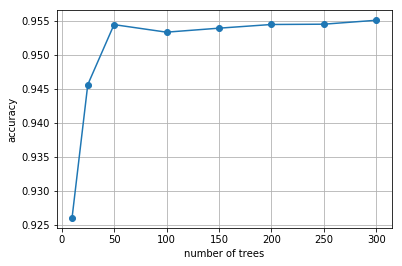

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(series, np.mean(test_scores,axis=1), '-o') 
plt.xlabel('number of trees')
plt.ylabel('accuracy')
plt.grid()
plt.show()

## Seeing importance measures in action

In [3]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()

y = boston.target
X = pd.DataFrame(boston.data, columns = 
                 boston.feature_names)
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size = 0.8, random_state = 123)

In [4]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 123)
rf.fit(X_train, y_train)

print('R^2 Training Score: ', rf.score(X_train, y_train))
print('OOB Score: ', rf.oob_score_)
print('R^2 Validation Score: ', rf.score(X_valid, y_valid))

R^2 Training Score:  0.9620949187819494
OOB Score:  0.7093667260280889
R^2 Validation Score:  0.8239084223508335


In [5]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp = permutation_importances(
    rf, X_train, y_train, r2)
print(perm_imp)

         Importance
Feature            
RM         0.819851
LSTAT      0.553908
DIS        0.060464
CRIM       0.046930
NOX        0.020097
TAX        0.018109
AGE        0.014672
PTRATIO    0.010275
B          0.009487
RAD        0.009275
INDUS      0.002886
ZN         0.000777
CHAS       0.000142


# Working with Almost Random Guesses

## Bagging Predictors with AdaBoost

### Seeing AdaBoost in action

In [6]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn import datasets

digits = datasets.load_digits()
X,y = digits.data, digits.target

In [7]:
DT = cross_val_score(AdaBoostClassifier(
        DecisionTreeClassifier(), 
        random_state=101) ,X, y, 
        scoring='accuracy',cv=10)
P = cross_val_score(AdaBoostClassifier(
        Perceptron(max_iter=5), random_state=101,
        algorithm='SAMME') ,X, y, 
        scoring='accuracy',cv=10)
NB = cross_val_score(AdaBoostClassifier(
        BernoulliNB(), random_state=101)
        ,X,y,scoring='accuracy',cv=10)

print ("Decision trees: %0.3f\nPerceptron: %0.3f\n"
       "Naive Bayes: %0.3f" % 
       (np.mean(DT),np.mean(P), np.mean(NB)))

Decision trees: 0.826
Perceptron: 0.909
Naive Bayes: 0.802


# Meeting Again with Gradient Descent

## Seeing GBM in action

In [8]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn import datasets

digits = datasets.load_digits()
X,y = digits.data, digits.target

In [9]:
GBM = cross_val_score(
    GradientBoostingClassifier(n_estimators=300, 
        subsample=0.8, max_depth=2, learning_rate=0.1,
        random_state=101), X, y, scoring='accuracy',cv=10)

print ("GBM: %0.3f" % (np.mean(GBM)))

GBM: 0.950
